This didn't make its way into the paper, but the idea is whether we can build a different kind of model, where a canonical trajectory appears simply through "decoherence" of synchronized baskets of projects.

Suppose scientists have K slots of projects that they can work on at any given time, and each project takes Poisson($\lambda$) amount of time to complete. They all start at $t=0$, and then when a given project ends, the scientist gets a publication, and that slot is replaced by another.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd

%matplotlib inline

In [89]:
N = 5000
T_max = 20

def check_project_exhaustion(timesteps_with_maturations, T_max):
    """
    Check if any individual has exhausted all projects before reaching T_max.
    
    :param timesteps_with_maturations: Array containing the timesteps when projects mature.
    :param T_max: The maximum timestep.
    :return: Boolean indicating if any individual has exhausted projects, and a list of such individuals.
    """
    # Check if the last maturity time for each project slot is less than T_max
    last_maturations = timesteps_with_maturations[:, :, -1]
    individuals_exhausted = np.any(last_maturations < T_max, axis=1)

    return np.any(individuals_exhausted), np.where(individuals_exhausted)[0]


def simulate(K, lam):
    # Step 1: Generate a large number of Poisson random variables for gaps
    max_projects = 40  # Arbitrarily large to ensure we don't run out
    gaps = stats.poisson.rvs(lam, size=(N, K, max_projects))

    # Step 2: Cumulatively sum the gaps to get timesteps with maturations
    timesteps_with_maturations = gaps.cumsum(axis=-1)


    has_exhausted, exhausted_individuals = check_project_exhaustion(timesteps_with_maturations, T_max)
    
    if has_exhausted:
        print(f"Warning: exhaustion reached for {len(exhausted_individuals)} individuals")

    # Filter out values larger than T_max
    valid_indices = timesteps_with_maturations < T_max

    # Convert valid timesteps to 1s (indicating productivity)
    productivity_increments = np.where(valid_indices, 1, 0)

    # Construct an empty array for the productivity matrix
    prods = np.zeros((N, T_max), dtype=int)

    # Use advanced indexing to mark productivity
    for i in range(N):
        for j in range(K):
            prods[i, timesteps_with_maturations[i, j, valid_indices[i, j]]] += productivity_increments[i, j, valid_indices[i, j]]
    
    df = pd.DataFrame(prods).melt(var_name="Year", value_name="Productivity")
    return df

df_5_3 = simulate(5, 3)

In [79]:
df_50_6

,Year,Productivity
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
99995,19,7
99996,19,9
99997,19,8
99998,19,7


In [68]:
df_20_3 = simulate(20, 3)

In [73]:
df_10_2 = simulate(10, 2)

In [90]:
df_50_6 = simulate(50, 6)

In [94]:
df_100_10 = simulate(100, 10)

In [98]:
df_100_6 = simulate(100, 6)

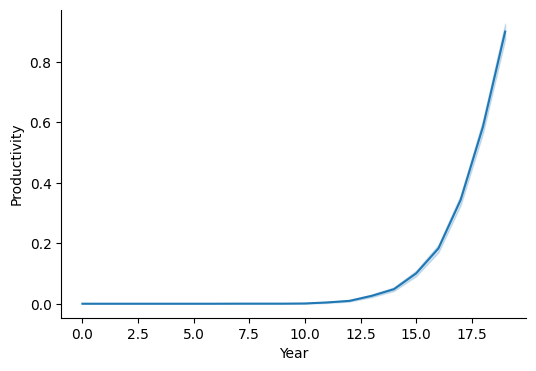

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(df_100_30, x="Year", y="Productivity", ax=ax)
sns.despine()

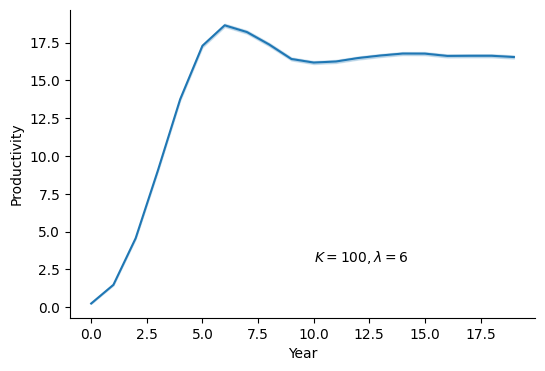

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(df_100_6, x="Year", y="Productivity", ax=ax)
ax.text(10, 3, "$K=100, \lambda=6$")
sns.despine()

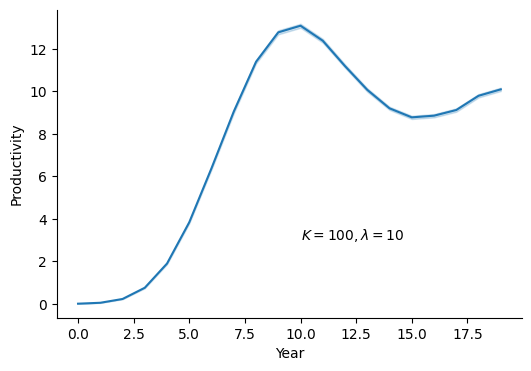

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(df_100_10, x="Year", y="Productivity", ax=ax)
ax.text(10, 3, "$K=100, \lambda=10$")
sns.despine()

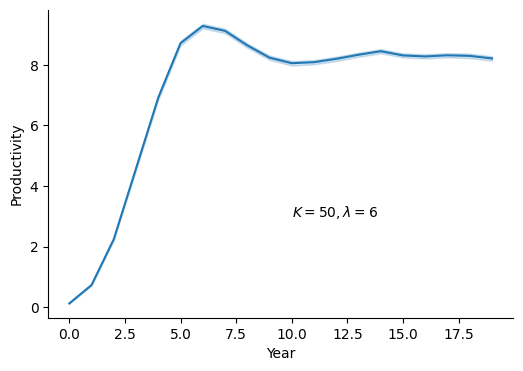

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(df_50_6, x="Year", y="Productivity", ax=ax)
ax.text(10, 3, "$K=50, \lambda=6$")
sns.despine()

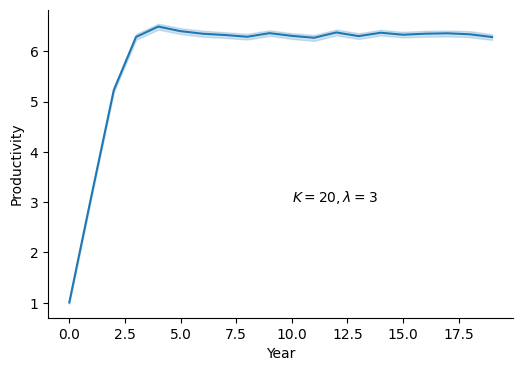

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(df_20_3, x="Year", y="Productivity", ax=ax)
ax.text(10, 3, "$K=20, \lambda=3$")
sns.despine()

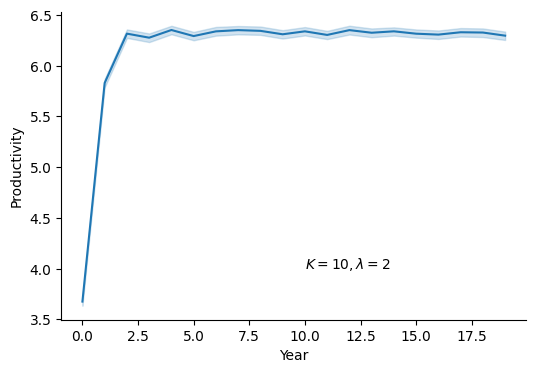

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(df_10_1, x="Year", y="Productivity", ax=ax)
ax.text(10, 4, "$K=10, \lambda=2$")
sns.despine()

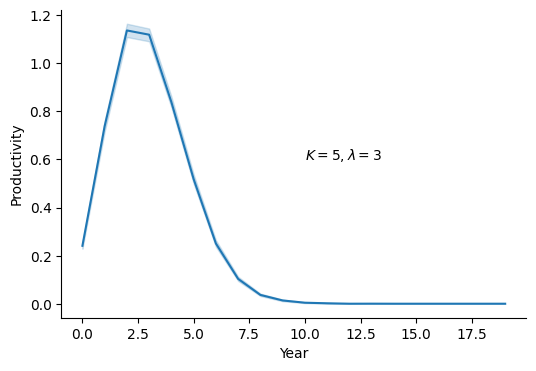

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

sns.lineplot(df_5_3, x="Year", y="Productivity", ax=ax)
ax.text(10, 0.6, "$K=5, \lambda=3$")
sns.despine()

In [18]:
gaps = stats.poisson.rvs([2]*50000)

In [22]:
prods = np.zeros([1000, 20])

In [20]:
gaps.reshape([1000, 10, 5]).cumsum(axis=1)

array([[[ 3,  1,  2,  2,  3],
        [ 7,  3,  2,  6,  4],
        [ 9,  4,  5,  7,  8],
        ...,
        [14, 14, 16, 15, 17],
        [15, 15, 17, 17, 18],
        [19, 15, 21, 20, 19]],

       [[ 4,  0,  1,  1,  1],
        [ 6,  1,  1,  3,  4],
        [ 7,  4,  5,  4,  4],
        ...,
        [11, 18, 15, 15, 19],
        [12, 22, 16, 18, 20],
        [12, 24, 18, 19, 25]],

       [[ 4,  5,  3,  3,  0],
        [ 6,  8,  7,  3,  5],
        [ 6, 13, 10,  3,  7],
        ...,
        [14, 27, 23,  6, 16],
        [17, 29, 24, 11, 19],
        [17, 31, 26, 11, 20]],

       ...,

       [[ 2,  2,  1,  3,  3],
        [ 5,  8,  4,  5,  4],
        [ 7, 10,  5,  7,  5],
        ...,
        [21, 21, 14, 14, 19],
        [22, 21, 16, 19, 20],
        [24, 25, 20, 21, 23]],

       [[ 4,  0,  2,  1,  3],
        [ 6,  4,  4,  3,  3],
        [ 8,  6,  8,  7,  6],
        ...,
        [18,  9, 13, 15, 18],
        [20, 11, 14, 17, 18],
        [24, 13, 16, 20, 18]],

       [[ 2,